# NRL 

https://www.aussportsbetting.com/data/historical-nrl-results-and-odds-data/

In [2]:
import pandas as pd
df = pd.read_csv('NRL.CSV')
df.drop(df.columns[12], axis=1, inplace=True)
df.drop(df.columns[12], axis=1, inplace=True)
df.head()

,Date,Kick-off (local),Home Team,Away Team,Home Score,Away Score,Play Off Game?,Over Time?,Home Odds,Draw Odds,Away Odds,Notes
0,25-Oct-20,19:30,Penrith Panthers,Melbourne Storm,20.0,26.0,Y,NaN,2.24,19.22,1.70,NaN
1,17-Oct-20,19:50,Penrith Panthers,South Sydney Rabbitohs,20.0,16.0,Y,NaN,1.38,23.20,3.18,NaN
2,16-Oct-20,18:50,Melbourne Storm,Canberra Raiders,30.0,10.0,Y,NaN,1.45,21.40,2.86,Played at Suncorp Stadium
3,10-Oct-20,19:50,Parramatta Eels,South Sydney Rabbitohs,24.0,38.0,Y,NaN,3.57,24.50,1.30,NaN
4,9-Oct-20,19:50,Sydney Roosters,Canberra Raiders,18.0,22.0,Y,NaN,1.43,21.90,2.91,NaN


## Arbitrage

In [13]:
df['arb'] = 1/df['Home Odds'] + 1/df['Away Odds'] # + 1/df['Draw Odds']

In [14]:
df[df['arb']<1]

,Date,Kick-off (local),Home Team,Away Team,Home Score,Away Score,Play Off Game?,Over Time?,Home Odds,Draw Odds,Away Odds,Notes,payout,arb
257,29-Jun-19,17:30,Newcastle Knights,Brisbane Broncos,26.0,12.0,NaN,NaN,1.72,19.45,2.46,NaN,344.0,0.987899
264,15-Jun-19,19:35,Parramatta Eels,Brisbane Broncos,38.0,10.0,NaN,NaN,1.73,19.10,2.63,NaN,346.0,0.958263
270,10-Jun-19,16:00,Canterbury Bulldogs,St George Dragons,12.0,36.0,NaN,NaN,2.95,19.16,1.59,NaN,318.0,0.967914
294,18-May-19,15:00,Gold Coast Titans,Canterbury Bulldogs,16.0,22.0,NaN,NaN,1.61,20.26,2.74,NaN,-200.0,0.986082


## Playing the Favourite

In [37]:
def bet(r):
    multiplier = min( r['Home Odds'] , r['Away Odds'] )
    return 100 * max( r['Home Odds'] , r['Away Odds'] ) / multiplier

df['bet'] = df.apply(bet, axis=1)
print(df['bet'].sum()/df['bet'].count())

213.84672839092215


In [44]:
def payout(r):
    multiplier = min( r['Home Odds'] , r['Away Odds'] )  - 1
    bet = r['bet']
    # draw
    if r['Home Score']==r['Away Score']:
        return bet*-1
    # home favourite
    if r['Home Odds'] < r['Away Odds']:
        # home loss
        if r['Home Score'] < r['Away Score']:
            return bet*-1
        # home win
        return bet*multiplier
    # away favourite
    if r['Away Odds'] < r['Home Odds']:
        # away loss
        if r['Away Score'] < r['Home Score']:
            return bet*-1
        # away win
        return bet*multiplier
    return 0

In [45]:
df['favourite payout'] = df.apply(payout, axis=1)

In [46]:
print(df['favourite payout'].sum())

-18356.673385221962


In [47]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year 
df['Month'] = df['Date'].dt.month 
df.groupby('Year')['favourite payout'].sum()

Year
2009.0    -651.412708
2010.0   -3248.668000
2011.0    -481.065444
2012.0   -1445.826529
2013.0   -2764.647105
2014.0   -4520.374855
2015.0   -4012.574690
2016.0    1798.598067
2017.0   -1231.777774
2018.0   -2879.181230
2019.0     283.736659
2020.0     796.520223
Name: favourite payout, dtype: float64

In [48]:
df.groupby('Month')['favourite payout'].sum()

Month
3.0    -6139.547165
4.0    -4354.980303
5.0     -600.791353
6.0    -1315.833041
7.0    -2660.108671
8.0    -4415.360836
9.0      254.809425
10.0     875.138559
Name: favourite payout, dtype: float64

In [49]:
df.head()

,Date,Kick-off (local),Home Team,Away Team,Home Score,Away Score,Play Off Game?,Over Time?,Home Odds,Draw Odds,Away Odds,Notes,payout,arb,Year,Month,favourite payout,bet
0,2020-10-25,19:30,Penrith Panthers,Melbourne Storm,20.0,26.0,Y,NaN,2.24,19.22,1.70,NaN,340.0,1.034664,2020.0,10.0,92.235294,131.764706
1,2020-10-17,19:50,Penrith Panthers,South Sydney Rabbitohs,20.0,16.0,Y,NaN,1.38,23.20,3.18,NaN,276.0,1.039103,2020.0,10.0,87.565217,230.434783
2,2020-10-16,18:50,Melbourne Storm,Canberra Raiders,30.0,10.0,Y,NaN,1.45,21.40,2.86,Played at Suncorp Stadium,290.0,1.039306,2020.0,10.0,88.758621,197.241379
3,2020-10-10,19:50,Parramatta Eels,South Sydney Rabbitohs,24.0,38.0,Y,NaN,3.57,24.50,1.30,NaN,260.0,1.049343,2020.0,10.0,82.384615,274.615385
4,2020-10-09,19:50,Sydney Roosters,Canberra Raiders,18.0,22.0,Y,NaN,1.43,21.90,2.91,NaN,-200.0,1.042943,2020.0,10.0,-203.496503,203.496503


<AxesSubplot:>

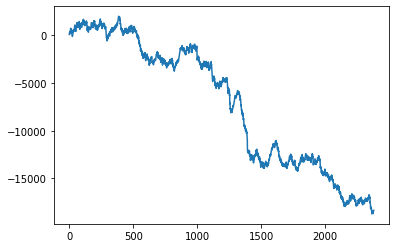

In [50]:
df['favourite payout'].cumsum().plot()

<AxesSubplot:>

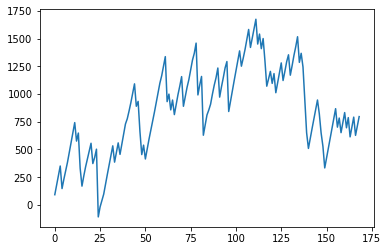

In [51]:
df.query('Year==2020')['favourite payout'].cumsum().plot()